In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy.orm import Session

from april.database import get_engine
from april.utils import microsoft_colors
from april.utils import prettify_dataframe
from april.enums import Base

sns.set_style('white')
pd.set_option('display.max_rows', 20)
%config InlineBackend.figure_format = 'retina'

## Hyperparameters

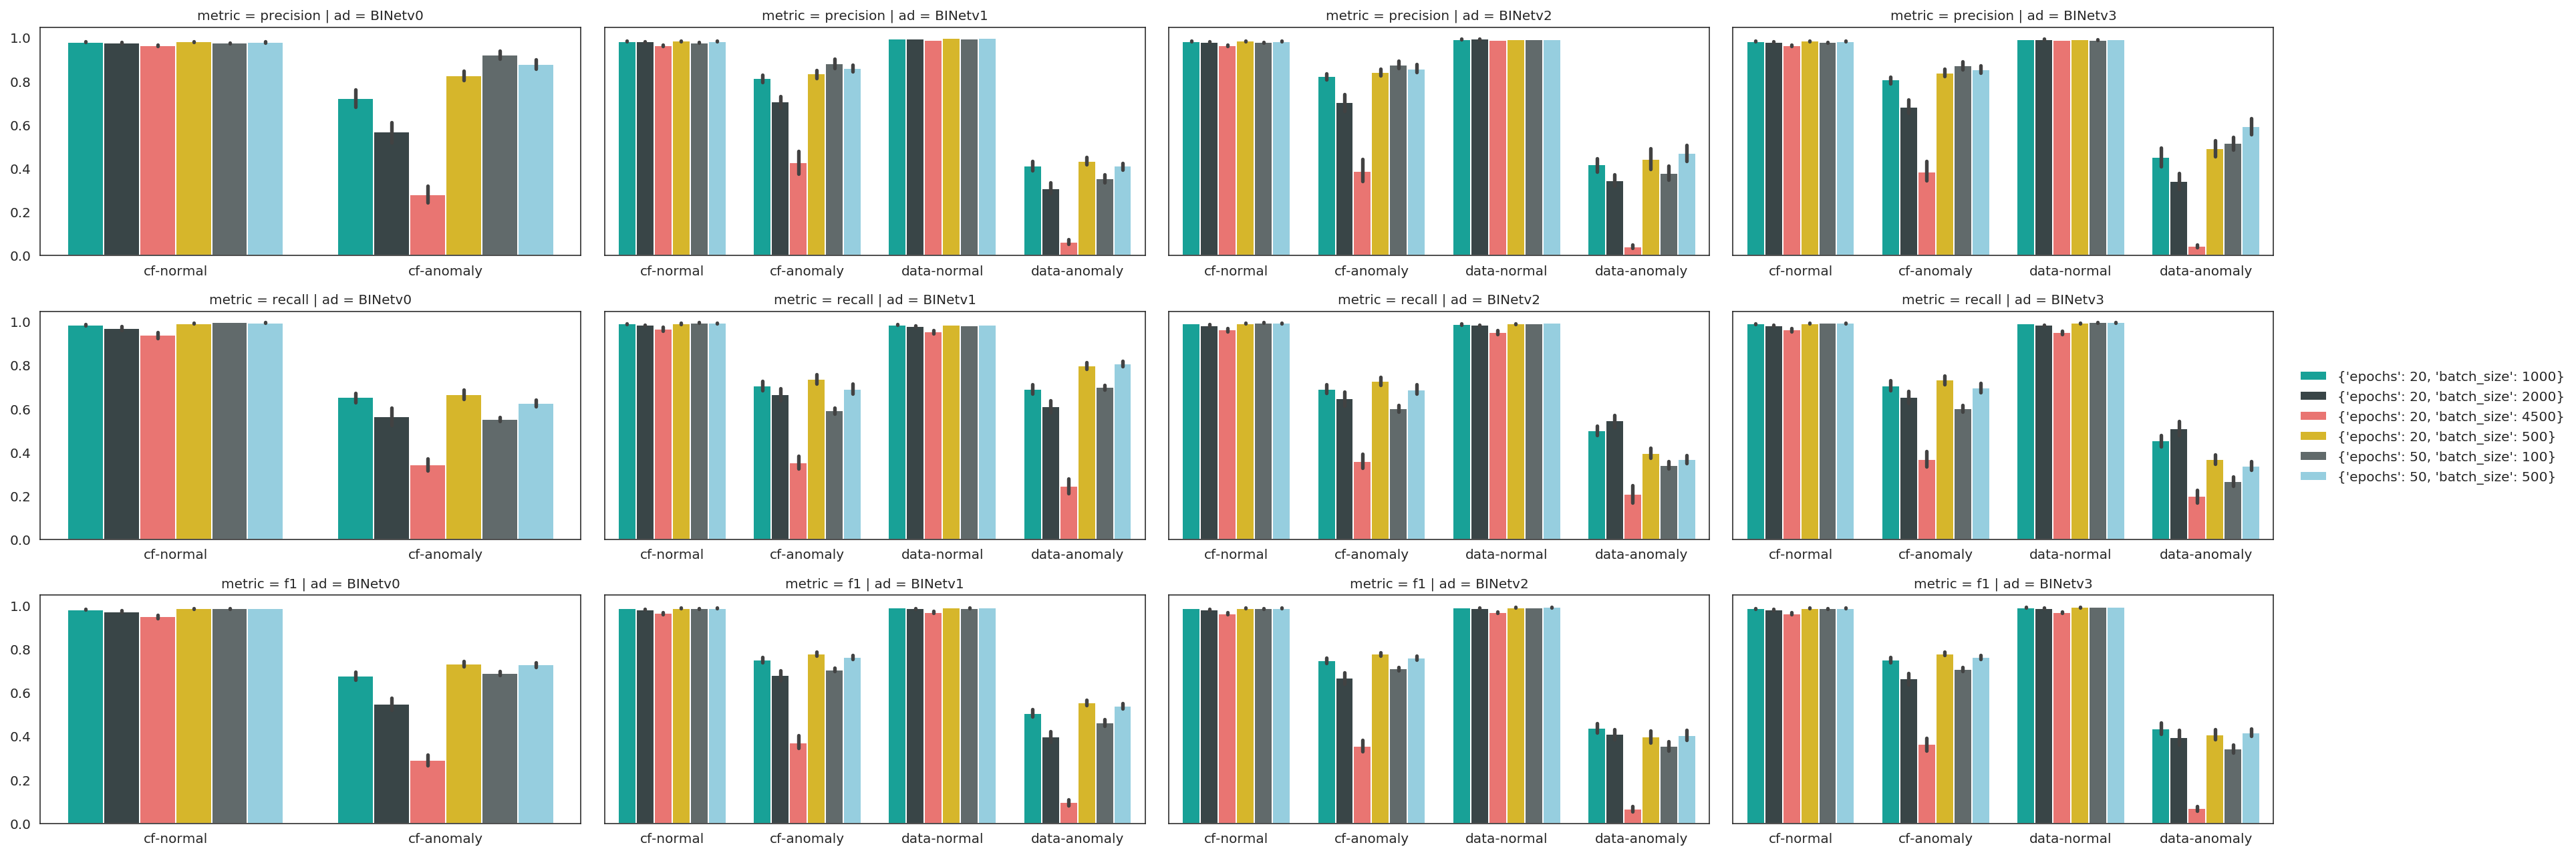

In [54]:
ads = ["BINetv0", "BINetv1", "BINetv2", "BINetv3"]

df = evaluation.query(f'ad in {ads} and strategy == "attribute" and heuristic == "best" and axis == 2 and dataset_type == "synthetic"')
hue_order = sorted(df['hyperparameters'].unique())
df = prettify_dataframe(df)
df['level-class'] = df['level'] + '-' + df['class']
df = df.melt(id_vars=['ad', 'dataset_type', 'level-class', 'hyperparameters'], value_vars=['precision', 'recall', 'f1'], var_name='metric')

g = sns.FacetGrid(data=df, col='ad', row='metric', sharex=False, sharey=True, despine=False, aspect=2, col_order=ads)
g = g.map_dataframe(sns.barplot, x='level-class', y='value', hue='hyperparameters', palette=microsoft_colors, hue_order=hue_order)
g = g.add_legend()

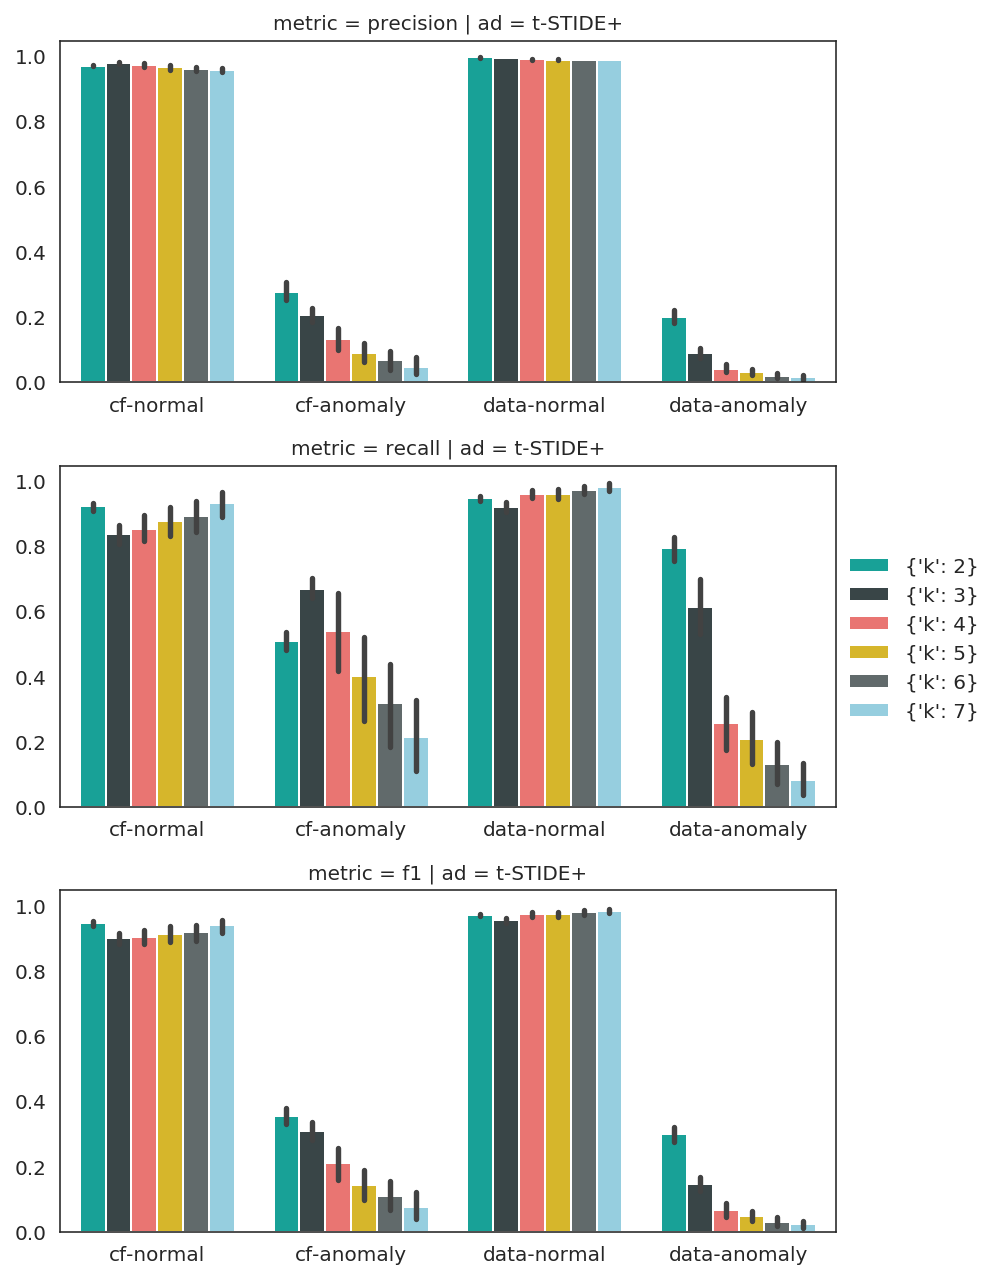

In [43]:
ads = ["t-STIDE+"]

df = evaluation.query(f'ad in {ads} and strategy == "attribute" and heuristic == "best" and axis == 2 and dataset_type == "synthetic"')
hue_order = sorted(df['hyperparameters'].unique())
df = prettify_dataframe(df)
df['level-class'] = df['level'] + '-' + df['class']
df = df.melt(id_vars=['ad', 'dataset_type', 'level-class', 'hyperparameters'], value_vars=['precision', 'recall', 'f1'], var_name='metric')

g = sns.FacetGrid(data=df, col='ad', row='metric', sharex=False, sharey=True, despine=False, aspect=2, col_order=ads)
g = g.map_dataframe(sns.barplot, x='level-class', y='value', hue='hyperparameters', palette=microsoft_colors, hue_order=hue_order)
g = g.add_legend()